## Data Classification of non-linear pattern using Radial Basis Function Network and KMeans Clustering


In [1]:
#Importing all the required libraries
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from math import *
from numpy.linalg import norm, pinv

In [2]:
# Creating the list variable for the train errors and test errors
train_error_list = []
test_error_list = []

In [3]:
class Radial_Bias_Function:
    
# Defining the Constructor for intializing the variable sigma and number of center points selected. 
  def __init__(self, sigma, numberOfCenterPoints):
    self.sigma = sigma
    self.centerList = None
    self.numberOfCenterPoints = numberOfCenterPoints
    self.Weights = None
    
# Calculating the RBF Gaussian Kernel function
  def gaussianKernel(self, x, vi):
    numerator = (np.linalg.norm(x-vi)**2)
    G_i = exp((- numerator)/2 * pow(self.sigma, 2))
    return G_i

# Defining the activation function
  def activationFunction(self, inputVector):
    Vector_G = np.zeros((inputVector.shape[0], self.numberOfCenterPoints), float)
    for centerIndex, center in enumerate(self.centerList):
      for xi, x in enumerate(inputVector):
        Vector_G[xi, centerIndex] = self.gaussianKernel(x, center)
    return Vector_G

# Defining the function used for calculating the output values
  def calculateOutput(self, inputVector):
    Vector_G = self.activationFunction(inputVector)
    O = np.dot(Vector_G, self.Weights)
    return O

# Defining the RBF training function and calculating the weights
  def training(self, inputVector, O):
    self.centerList = inputVector
    Vector_G = self.activationFunction(inputVector)
    self.Weights = np.dot(np.linalg.pinv(Vector_G), O)

# Calculation of the error using mean square error method
  def errorCalculation(self, true_output, calculate_output):
    dif_vec = []
    for i in range(len(true_output)):
      diff = true_output[i] - calculate_output[i]
      diff_sq = pow(diff, 2)
      dif_vec.append(diff_sq)
    return sum(dif_vec)/len(true_output)


In [4]:
# Generating the input dataset by using the function given in the problem
dataSet = []
for i in range(0, 21):
  for j in range(0,21):
    dataSet.append([(-2 + (0.2 * i)), (-2 + (0.2 * j))])


In [5]:
# Calculating the corresponding dataset labels for the generated input dataset
dataSetLabel = []
for xi, xj in dataSet:
  if (pow(xi,2) + pow(xj,2)) > 1:
    dataSetLabel.append(-1)
  else:
    dataSetLabel.append(1)

# Spiliting the dataset into training set and test set
trainSet, testSet, trainLabelSet, testLabelSet = train_test_split(np.array(dataSet), dataSetLabel, test_size=0.2, random_state=99)

In [6]:
# Intializing the sigma values
Sigma = [0.1,0.2,0.4,0.6,0.8]
for sigma_value in Sigma:
  rbf = Radial_Bias_Function(sigma_value, len(dataSet))
  rbf.training(trainSet, trainLabelSet)
  n = rbf.calculateOutput(trainSet)
  train_error = rbf.errorCalculation(trainLabelSet,n)
  train_error_list.append(train_error)
  test_output = rbf.calculateOutput(testSet)
  test_error = rbf.errorCalculation(testLabelSet, test_output)
  test_error_list.append(test_error)

  print('Mean square error for sigma ', sigma_value, 'of the training dataset', train_error*100, '%')
  print('Mean square error for sigma ', sigma_value, 'of the test dataset', test_error*100, '%')
  print('')
  print('')

Mean square error for sigma  0.1 of the training dataset 11.523283764042636 %
Mean square error for sigma  0.1 of the test dataset 14.636412128973541 %


Mean square error for sigma  0.2 of the training dataset 10.463893645249879 %
Mean square error for sigma  0.2 of the test dataset 13.411251192106707 %


Mean square error for sigma  0.4 of the training dataset 8.696944207291711 %
Mean square error for sigma  0.4 of the test dataset 12.597267011578165 %


Mean square error for sigma  0.6 of the training dataset 6.018173495422213 %
Mean square error for sigma  0.6 of the test dataset 11.967068437853628 %


Mean square error for sigma  0.8 of the training dataset 5.39897206833137 %
Mean square error for sigma  0.8 of the test dataset 16.17479499310535 %




Text(0.5, 1.0, 'Mean sqaure error accuracy of the training dataset')

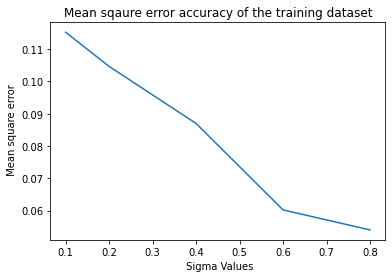

In [7]:
plt.plot(Sigma,train_error_list)
plt.xlabel(" Sigma Values")
plt.ylabel(" Mean square error")
plt.title("Mean sqaure error accuracy of the training dataset")

#### **This graph shows that as sigma value (spread operator) increases, the mean square error of the training dataset decreases**

Text(0.5, 1.0, 'Mean sqaure error accuracy of the testing dataset')

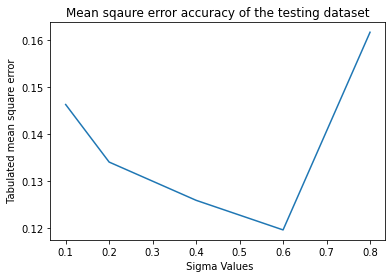

In [8]:
plt.plot(Sigma,test_error_list)
plt.xlabel(" Sigma Values")
plt.ylabel(" Tabulated mean square error")
plt.title("Mean sqaure error accuracy of the testing dataset")

#### **From the above graph, we observed that mean square error of test dataset also decreases as the sigma values increases. But after the sigma value is 0.6, mean square error increases dramatically which indicates that model is getting overfitted.**

### Part 2 a) Randomly select the 150 centers from the input data

In [9]:
class Radial_Bias_Function:
    
# Constructor used to intialize the variable sigma and number of center points selected. 
  def __init__(self, sigma, numberOfCenterPoints):
    self.sigma = sigma
    self.centerList = None
    self.numberOfCenterPoints = numberOfCenterPoints
    self.Weights = None

# Calculating the RBF Gaussian Kernel function
  def gaussianKernel(self, x, vi):
    numerator = (np.linalg.norm(x-vi)**2)
    G_i = exp((- numerator)/2 * pow(self.sigma, 2))
    return G_i

# Defining the activation function
  def activationFunction(self, inputVector):
    Vector_G = np.zeros((inputVector.shape[0], self.numberOfCenterPoints), float)
    for centerIndex, center in enumerate(self.centerList):
      for xi, x in enumerate(inputVector):
        Vector_G[xi, centerIndex] = self.gaussianKernel(x, center)
    return Vector_G

# Defining the function used for calculating the output values
  def calculateOutput(self, inputVector):
    Vector_G = self.activationFunction(inputVector)
    O = np.dot(Vector_G, self.Weights)
    return O

# Random selecting the center points from the input data.
  def randomlySelectCenterPoints(self, inputVector):
    rand_poit = np.random.choice(len(inputVector), self.numberOfCenterPoints)
    center_list = inputVector[rand_poit]
    return center_list

# Defining the RBF training function and calculating the weights
  def training(self, inputVector, O):
    self.centerList = self.randomlySelectCenterPoints(inputVector)
    Vector_G = self.activationFunction(inputVector)
    self.Weights = np.dot(np.linalg.pinv(Vector_G), O)

# Calculation of the error using mean square error method
  def errorCalculation(self, true_output, calculate_output):
    dif_vec = []
    for i in range(len(true_output)):
      diff = true_output[i] - calculate_output[i]
      diff_sq = pow(diff, 2)
      dif_vec.append(diff_sq)
    return sum(dif_vec)/len(true_output)


In [10]:
# Total number of center points is 150
rbf = Radial_Bias_Function(0.6, 150)
rbf.training(trainSet, trainLabelSet)
n = rbf.calculateOutput(trainSet)
train_error = rbf.errorCalculation(trainLabelSet,n)
test_output = rbf.calculateOutput(testSet)
test_error = rbf.errorCalculation(testLabelSet, test_output)

print('Mean square error for 150 center of the training dataset', train_error*100, '%')
print('Mean square error for 150 center of the test dataset', test_error*100, '%')
print('')
print('')

Mean square error for 150 center of the training dataset 6.263678720927636 %
Mean square error for 150 center of the test dataset 10.013251592607219 %




### **Part 2 b) Using K-Means algorithm to find the center**

In [11]:
class Radial_Bias_Function:
    
# Defining the Constructor for intializing the variable sigma and number of center points selected. 
  def __init__(self, sigma, numberOfCenterPoints):
    self.sigma = sigma
    self.centerList = None
    self.numberOfCenterPoints = numberOfCenterPoints
    self.Weights = None

# Calculating the RBF Gaussian Kernel function
  def gaussianKernel(self, x, vi):
    numerator = (np.linalg.norm(x-vi)**2)
    G_i = exp((- numerator)/2 * pow(self.sigma, 2))
    return G_i

# Defining the activation function
  def activationFunction(self, inputVector):
    Vector_G = np.zeros((inputVector.shape[0], self.numberOfCenterPoints), float)
    for centerIndex, center in enumerate(self.centerList):
      for xi, x in enumerate(inputVector):
        Vector_G[xi, centerIndex] = self.gaussianKernel(x, center)
    return Vector_G

# Defining the function used for calculating the output values
  def calculateOutput(self, inputVector):
    Vector_G = self.activationFunction(inputVector)
    O = np.dot(Vector_G, self.Weights)
    return O

# Using K-Means algorithm for finding the centers
  def findCenterPointsUsingKMeans(self, inputVector):
    km = KMeans(n_clusters= self.numberOfCenterPoints , max_iter = 1)
    km.fit(inputVector)
    center_list = km.cluster_centers_
    return center_list

# Defining the RBF training function and calculating the weights
  def training(self, inputVector, O):
    self.centerList = self.findCenterPointsUsingKMeans(inputVector)
    Vector_G = self.activationFunction(inputVector)
    self.Weights = np.dot(np.linalg.pinv(Vector_G), O)

# Error Calculation function for the calculating the error using mean square error method
  def errorCalculation(self, true_output, calculate_output):
    dif_vec = []
    for i in range(len(true_output)):
      diff = true_output[i] - calculate_output[i]
      diff_sq = pow(diff, 2)
      dif_vec.append(diff_sq)
    return sum(dif_vec)/len(true_output)


In [12]:
# Total number of center points is 150
rbf = Radial_Bias_Function(0.6, 150)
rbf.training(trainSet, trainLabelSet)
n = rbf.calculateOutput(trainSet)
train_error = rbf.errorCalculation(trainLabelSet,n)
test_output = rbf.calculateOutput(testSet)
test_error = rbf.errorCalculation(testLabelSet, test_output)

print('Mean square error for 150 center using KMeans of the training dataset', train_error*100, '%')
print('Mean square error for 150 center using KMeans of the test dataset', test_error*100, '%')
print('')
print('')

Mean square error for 150 center using KMeans of the training dataset 6.043520692072024 %
Mean square error for 150 center using KMeans of the test dataset 11.553480404708406 %




### Comparison of performance

**Comparing kmeans approach with randomly selected 150 center points approach.**
- In 2(a) where we randomly selected 150 center points from input, we got mean square error of 6.26% for training dataset and 10.01% for test dataset. Apparently, in 2(b) where by using kmeans we found out center points from the input, we got mean square error of 6.04% for training dataset and 11.55% for test dataset. The sigma value is considered as 0.6 in both the cases. 
- If we set sigma = 0.8 then, we can see that by selecting center points using kmeans gives better result its mean squared error for test dataset is 11.84%. Where as, for randomly selected approach is 17.29% which is much higher than kmeans approach. 

**Comparing first approach with all datapoints as center points with 150 datapoints as center points.**
- So by comparing, the mean square error, we can say that the approach with all the datapoints as center points, does overfit the network. So the mean square error is low for training set. But by compraing with the second approach, where 150 points are center points, does not overfit the network. So its mean squared error is greater compared to first approach.  
- The mean squared error for test dataset of first approach is more because of overfitting, and mean squared error for test dataset in second approach is less. Because only 150 datapoints are used as center points and the network is not overfitted. the sigma value is considered same.

**References:**
* https://towardsdatascience.com/most-effective-way-to-implement-radial-basis-function-neural-network-for-classification-problem-33c467803319
* https://pythonmachinelearning.pro/using-neural-networks-for-regression-radial-basis-function-networks/